# Aplicación de la Inteligencia Artificial en la Educación: Predicción del Rendimiento Académico en Secundaria

![Imagen cabecera](../img/cabecera.jpg)

## Introducción
En la actualidad, el análisis de datos educativos ha cobrado gran relevancia para comprender los factores que influyen en el rendimiento académico de los estudiantes. Gracias a los avances en el aprendizaje automático (machine learning), es posible desarrollar modelos predictivos que permitan identificar patrones y generar estrategias para mejorar los resultados escolares.

Este estudio se centra en la construcción y evaluación de un modelo de machine learning capaz de predecir la clasificación de las calificaciones de los estudiantes de secundaria, utilizando un conjunto de datos detallado de 2392 alumnos. Dicho conjunto de datos incluye variables demográficas, hábitos de estudio, participación parental y actividades extracurriculares, proporcionando una base sólida para el análisis.

El objetivo principal de este trabajo es diseñar un modelo que no solo logre una predicción precisa de la variable objetivo (GradeClass), sino que también ofrezca interpretabilidad sobre los factores más influyentes en el desempeño académico. Para ello, se explorarán diferentes algoritmos de clasificación, evaluando su desempeño mediante métricas clave y comparando sus resultados para determinar el más adecuado.

A través de esta investigación, se espera que los hallazgos contribuyan a la toma de decisiones informadas en el ámbito educativo, facilitando la implementación de estrategias de intervención temprana y personalización del aprendizaje en función de las características individuales de los estudiantes.

## Objetivo del Trabajo
El objetivo principal de este proyecto es aplicar técnicas de machine learning para predecir el rendimiento académico de estudiantes de secundaria, clasificados según su desempeño en distintas categorías de calificación. A través del análisis de un conjunto de datos exhaustivose pretende identificar patrones que puedan ayudar a mejorar las estrategias educativas y personalizar el aprendizaje de los estudiantes.

## Enfoque y Metodología
Para lograr los objetivos planteados, se emplearán dos enfoques principales: modelos lineales y árboles de decisión. Los modelos lineales, como la regresión logística, se utilizarán para explorar relaciones lineales entre las variables predictoras y la clasificación del rendimiento académico. Por otro lado, los árboles de decisión permitirán una interpretación más detallada de cómo diferentes factores afectan la clasificación de los estudiantes, ya que proporcionan una estructura jerárquica que facilita la visualización de los patrones en los datos.

Ambos enfoques serán evaluados en términos de precisión, exactitud, y otras métricas clave de rendimiento para determinar cuál es el modelo más adecuado para la predicción del rendimiento académico. Además, se pondrá especial énfasis en la interpretabilidad de los modelos, para que los resultados sean comprensibles y útiles en un contexto educativo.

## Lista de Variables

### Variables Predictoras (Features)

- **StudentID**: Identificador único asignado a cada estudiante (1001 a 3392).
    - Tipo: Categórica.
- **Age**: Edad de los estudiantes (15 a 18 años).
    - Tipo: Categórica
- **Gender**: Género de los estudiantes.  
    - Tipo: Binaria.
- **Ethnicity**: Etnia de los estudiantes.  
    - Tipo: Categórica.
- **ParentalEducation**: Nivel de educación de los padres. 
    - Tipo: Categórica.
- **StudyTimeWeekly**: Tiempo de estudio semanal en horas (0 a 20 horas).
    - Tipo: Numérica
- **Absences**: Número de ausencias durante el año escolar (0 a 30).
    - Tipo: Numérica
- **Tutoring**: Estado de la tutoría.  
    - Tipo: Binaria.
- **ParentalSupport**: Nivel de apoyo parental.  
    - Tipo: Categórica.
- **Extracurricular**: Participación en actividades extracurriculares.  
    - Tipo: Binaria.
- **Sports**: Participación en deportes.  
    - Tipo: Binaria.
- **Music**: Participación en actividades musicales. 
    - Tipo: Binaria.
- **Volunteering**: Participación en voluntariado.  
    - Tipo: Binaria.
- **GPA**: Promedio de calificaciones en una escala de 2.0 a 4.0.
    - Tipo: Numérica

### Variable Objetivo (Target)

- **GradeClass**: Clasificación de las calificaciones de los estudiantes según el GPA.
    - Tipo: Categórica.

NOTA: El sistema de GPA (Grade Point Average) es un sistema de calificación utilizado principalmente en países como EE.UU., que refleja el promedio ponderado de las calificaciones obtenidas por un estudiante en diferentes asignaturas. Es un valor numérico en una escala generalmente de 0.0 a 4.0, donde:

- 4.0 es la calificación más alta (A, excelente).

- 0.0 es la calificación más baja (F, suspenso).


Sin embargo, en este dataset la clasificación de notas es la siguiente:
- 0: A (Sobresaliente)
- 1: B (Notable)
- 2: C (Bien)
- 3: D (Suficiente)
- 4: F (Suspenso)

Siendo 0 la mejor nota y 4 la peor de ellas.

### 0. Importar librerías

Antes de comenzar el análisis importaremos las librerías necesarias para la manipulación, predicción y visualización de datos.

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

import lightgbm as lgb


### 1. Carga y exploración de datos

A continuación, cargaremos el dataset desde un archivo CSV.  
Para ello, utilizamos la librería **pandas**, que nos permite leer y manipular datos de manera eficiente.

Además, antes de realizar el análisis verificaremos el tipo de datos de cada columna y si hay valores nulos o duplicados.

In [10]:
# Carga de datos
df = pd.read_csv('../data/Student_performance_data _.csv')

In [11]:
# Establecer la columna 'StudentID' como índice
df = df.set_index('StudentID')

In [12]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 280.3 KB


In [14]:
# Comprobación de valores nulos
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [15]:
# Comprobación de duplicados
df.duplicated().sum()

0

Tal y como se ve con anterioridad, el presente dataset no presenta valores nulos ni duplicados, por lo tanto no es neceario realizar ningún tipo de imputación más adelante.

Antes de continuar debemos realizar un análisis a la variable 'GPA' ya que es posible que produzca Data leakage ya que tiene una relación directa con la variable objetivo.

In [25]:
# Calcular la correlación de Pearson
correlation = df[['GPA', 'GradeClass']].corr()
print(correlation)

                 GPA  GradeClass
GPA         1.000000   -0.782835
GradeClass -0.782835    1.000000


Al obtener una correlación absoluta de 0.78, podemos decir que existe una correlación muy fuerte entre la variable 'GPA' y el target pero no se confirma al 100%, por lo que, para verificarlo, se entrenará un modelo simple sólo con dicha variable.

In [29]:
# Usar solo GPA como predictor
X = df[['GPA']]
y = df[['GradeClass']]

# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo simple
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar precisión
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo solo con GPA: {accuracy:.4f}")

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precisión del modelo solo con GPA: 0.8852


Finalmente hemos obtenido una precisión de aproximadamente el 90%, por lo que procederemos a eliminar esa columna de los datos.

In [39]:
# Crear copia
df_2 = df.copy()

In [40]:
# Eliminar la columna 'GPA'
df_2 = df_2.drop(columns=['GPA'])

In [41]:
# Visualizar los primeros datos
df_2.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
StudentID,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


### 2. Separación en Train y Test

A continuación se procederá a la división del dataset en train y test para realizar posteriormente un análisis del target y las características.

In [42]:
train_set, test_set = train_test_split(df_2, test_size= 0.2, random_state= 42)

### 3. Análisis exploratorio de datos (MiniEDA)

En este apartado se tratará de analizar la distribución del target y las características, así como la posible relación existente entre ellas.

Para ello, estableceremos en primer lugar, una serie de listas correspondientes a si las características se tratan de variables numéricas, categóricas o binarias. También identificaremos la variable objetivo.

In [70]:
# Variable objetivo
target = 'GradeClass'

# Variables numéricas
numerical_cols = ['StudyTimeWeekly', 'Absences']

# Variables binarias
binary_cols = [col for col in train_set.columns if train_set[col].nunique() == 2]

# Variables categóricas
categorical_cols = [col for col in train_set.columns if col not in numerical_cols and col not in binary_cols and col not in target]

In [71]:
print(f'Target:{target}')
print(f'Columnas numéricas:{numerical_cols}')
print(f'Columnas binarias:{binary_cols}')
print(f'Columnas categóricas:{categorical_cols}')

Target:GradeClass
Columnas numéricas:['StudyTimeWeekly', 'Absences']
Columnas binarias:['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
Columnas categóricas:['Age', 'Ethnicity', 'ParentalEducation', 'ParentalSupport']


#### A. Análisis del target

Es importante saber la distribución del target ya que será necesario para poder elegir la métrica adecuada a la hora de evaluar el modelo.


In [51]:
train_set[target].value_counts(True)

GradeClass
4.0    0.509148
3.0    0.171458
2.0    0.159958
1.0    0.115003
0.0    0.044433
Name: proportion, dtype: float64

In [119]:
# Comprobamos que la distribución de test sea igual
test_set[target].value_counts(True)

GradeClass
4.0    0.494781
3.0    0.179541
2.0    0.177453
1.0    0.102296
0.0    0.045929
Name: proportion, dtype: float64

C:\Users\maria\AppData\Local\Temp\ipykernel_11356\1835751789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=train_set, palette='Set2')


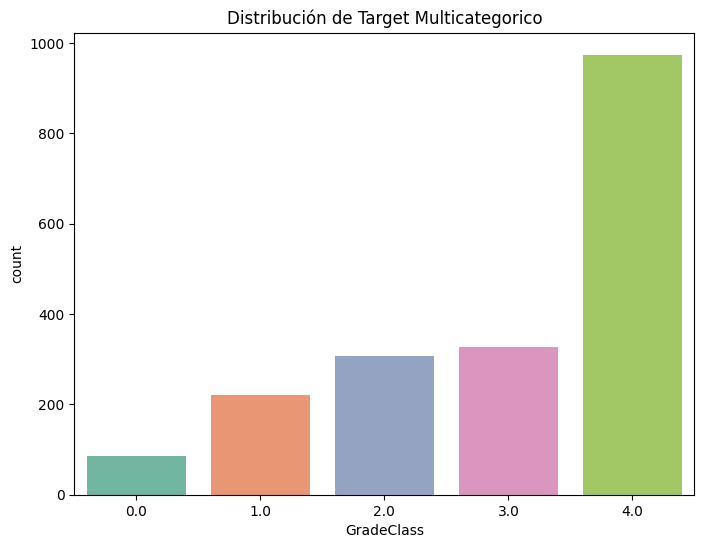

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=train_set, palette='Set2')
plt.title('Distribución de Target Multicategorico')
plt.show();

El resultado obtenido es bastante desbalanceado por lo tanto tendremos que usar 'Balance Accuracy' para evitar que el modelo solamente prediga la clase mayoritaria que es la clase F correspondiente a los suspensos.

#### B. Análisis de variables numéricas

C:\Users\maria\AppData\Local\Temp\ipykernel_11356\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


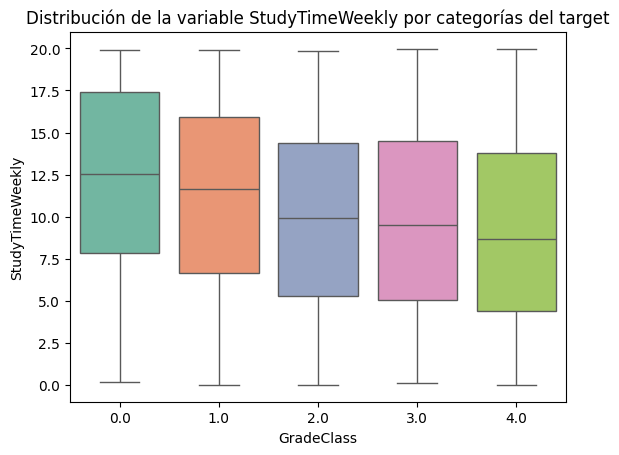

C:\Users\maria\AppData\Local\Temp\ipykernel_11356\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


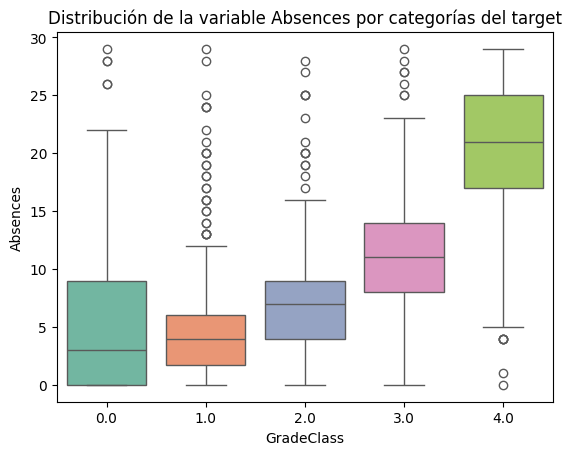

In [87]:
for col in numerical_cols:
    sns.boxplot(x=target, y= col, data=train_set, palette='Set2')
    plt.title(f'Distribución de la variable {col} por categorías del target')
    plt.show();

**Conclusiones**:
- Study: a pesar de que la diferencia en medias de estudio no es muy drástica, aquellos que han conseguido sobresalientes dedican de media 12.5 horas de estudio mientras que aquellos que suspenden dedican un poco más de la mitad.
- Absences: existe una clara diferencia de ausencias entre los estudiantes que aprueban y los que no, teniendo estos últimos una mayor media de ausencias establecida entorno a 22, mientras que los estudiantes de sobresaliente no llegan a 5 ausencias. Además la clase 1, correspondiente a los alumnos de notable  son los que presentan mas *outliers*.

array([[<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>]], dtype=object)

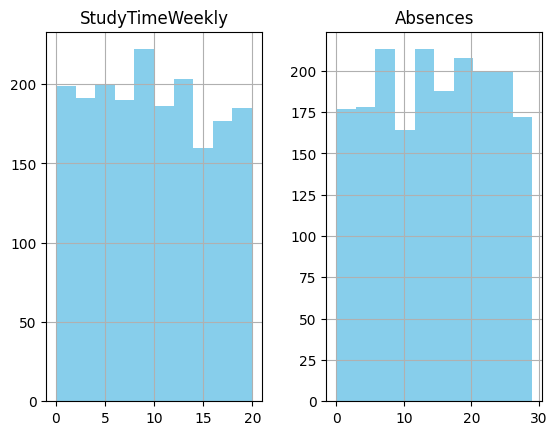

In [72]:
train_set[numerical_cols].hist(color='skyblue')

Por otro lado, se observa que ninguna de las columnas numéricas presenta una distribución normal, por lo tanto habrá que normalizarlas posteriormente.

In [ ]:
# Aplicar ANOVA para cada variable numérica
for col in numerical_cols:  
    groups = [train_set[train_set[target] == category][col] for category in train_set[target].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: StudyTimeWeekly - p-value: 7.51501249648204e-08
Variable: Absences - p-value: 0.0


Además, ambas variables presentan un p-value inferior a 0.05, por lo que son claves para determinar ell target.

#### C. Análisis de variables binarias

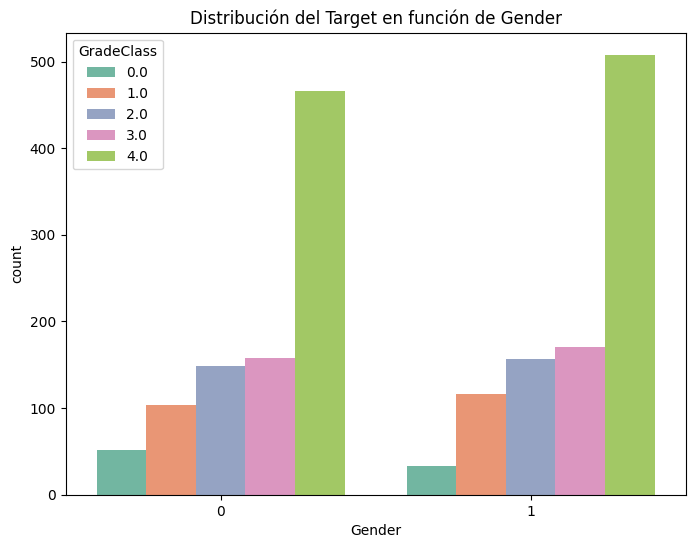

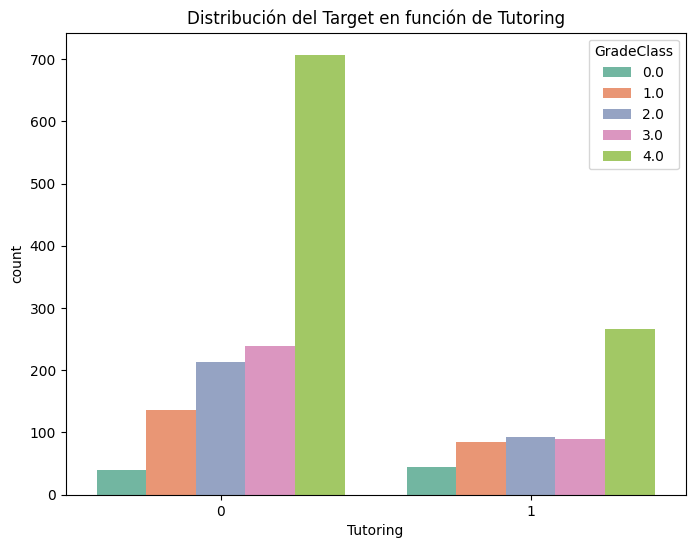

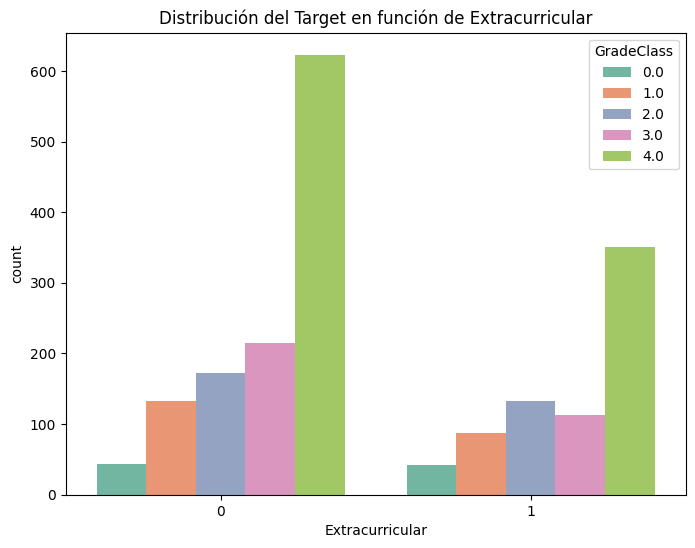

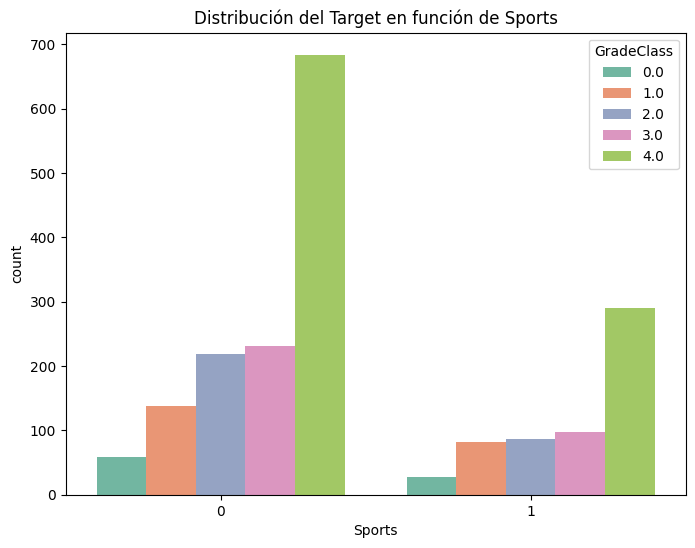

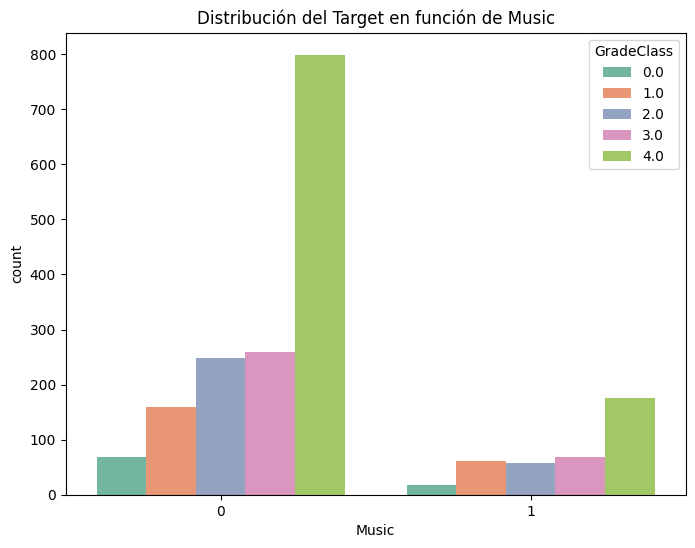

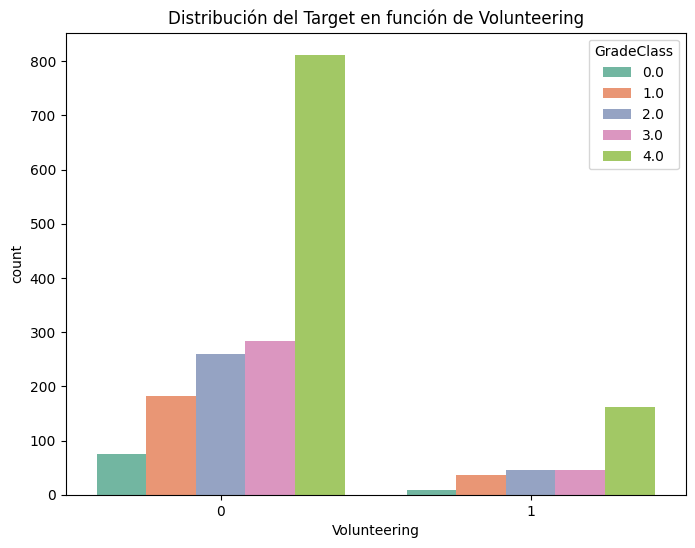

In [73]:
for feature in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue= target, data=train_set, palette='Set2')
    plt.title(f'Distribución del Target en función de {feature}')
    plt.xlabel(feature)

**Conclusiones:**
- Gender: tanto hombres como mujeres presentan una distribución similar en sus notas, por lo que el rendimiento académico no está tan influenciado por el género.
- Tutoring: los estudiantes que van a tutorías tienen una mejor distribución de notas en comparación con los que no asisten, lo que sugiere que las tutorías pueden ser beneficiosas para mejorar el rendimiento académico.
- Extracurricular: aquellos estudiantes que acuden a actividades extracurriculares tienen un rendimiento cercano al promedio
- Sports: existe una distribución más uniforme en notas para aquellos que realizan algún deporte.
- Music: al igual que en Sports, la distribución de notas es mucho más uniforme para aquellos que acuden a actividades de música, pero en el caso de los suspensos son mucho menores.
- Volunteering: su distribución de notas también es muy uniforme a excepción de las notas suspensas.

In [ ]:
for col in binary_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Tabla de contingencia
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Gender - p-value: 0.2158413582198951
Variable: Tutoring - p-value: 1.4756465412189e-06
Variable: Extracurricular - p-value: 0.01528317448329639
Variable: Sports - p-value: 0.21303174571566344
Variable: Music - p-value: 0.02295410225493383
Variable: Volunteering - p-value: 0.4618150567662842


Las variables 'Tutoring', 'Extracurricular' y 'Music' están fueremente correlacionadas con el target, por lo que serán determinantes a la hora de predecirlo.

#### D. Análisis de variables categóricas

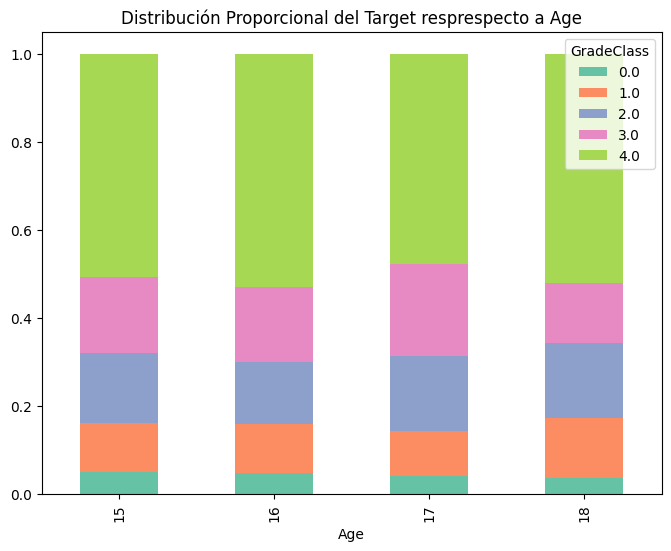

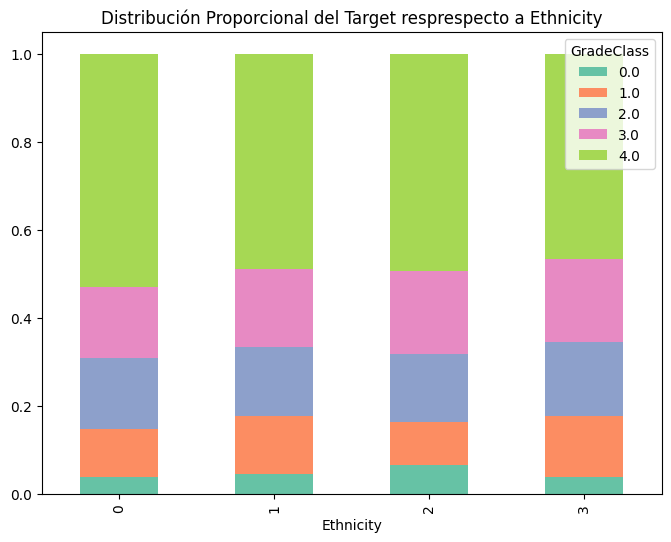

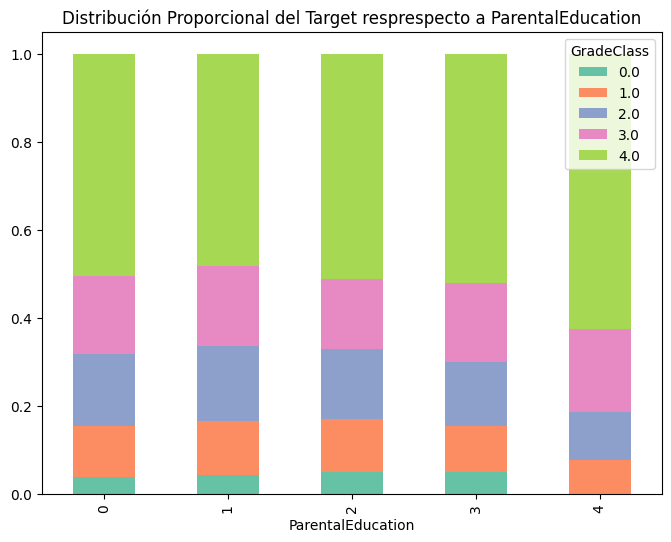

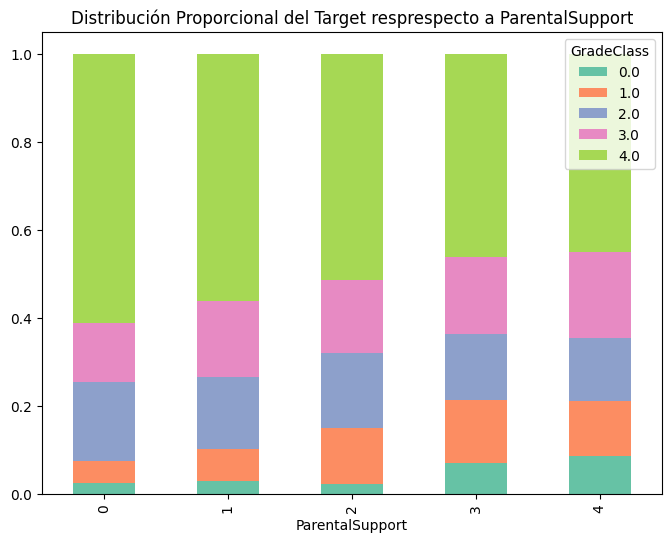

In [80]:
for col in categorical_cols:

    # Calcular las proporciones
    proporciones = train_set.groupby(col)[target].value_counts(normalize=True).unstack().fillna(0)

    # Graficar las proporciones
    proporciones.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('Set2'))

    plt.title(f'Distribución Proporcional del Target resprespecto a {col}')
    plt.xlabel(col)
    plt.show()

**Conclusiones:**
- Age: la distribución de notas es bastante uniorme en todas las edades, aunque se observa que los sobresalinetes van disminuyendo.
- Ethnicity: aparentemente esta variable no presenta disrupciones notables en las notas, aunque podríamos destacar que los alumnos asiáticos presentan más sobresalientes mientras que los caucásicos son los que más suspenden.
- ParentalEducation: hay una clara diferencia para los alumnos cuyos padre poseen una educación superior a la Licenciatura ya que no presentan sobresalientes y son los que más suspensos tienen.
- ParentalSupport: aquellos alumnos cuyos padres les dedican más tiempo presentan mejores que notas que aquellos a los que la dedicación es nula. Además, a medida que se dedica más tiempo a los hijos se aprecia como los suspensos disminuyen.

In [97]:
for col in categorical_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Tabla de contingencia
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Age - p-value: 0.31029217257615616
Variable: Ethnicity - p-value: 0.5148249972345624
Variable: ParentalEducation - p-value: 0.6279170356767412
Variable: ParentalSupport - p-value: 1.4795707468745323e-06


La variable 'ParentalSupport' presenta un p-value muy bajo, por lo que tiene una relación significativa con el target.

#### Correlación entre variables numéricas

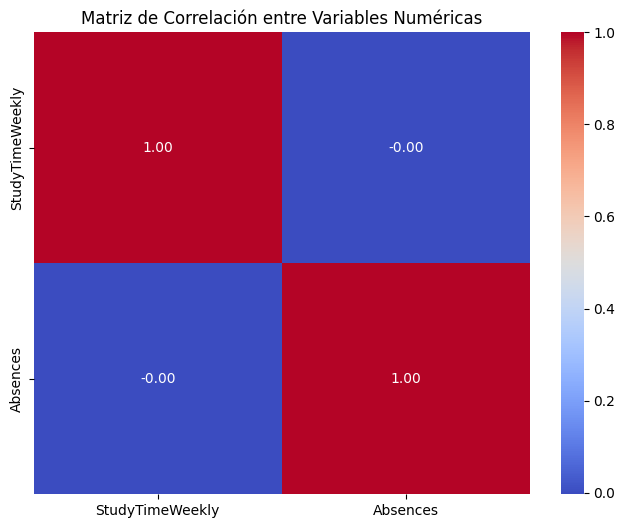

In [110]:
correlation_matrix = train_set[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

No existe ningún tipo de correlación entre las variables numéricas.

#### Correlación entre variables binarias y categóricas

In [101]:
cat_col = categorical_cols + binary_cols

In [102]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

for col in cat_col:
    contingency_table = pd.crosstab(train_set[col], train_set[target])
    print(f"Variable: {col} - Cramér's V: {cramers_v(contingency_table)}")

Variable: Age - Cramér's V: 0.04912812179614835
Variable: Ethnicity - Cramér's V: 0.044107579837173526
Variable: ParentalEducation - Cramér's V: 0.04217005272580283
Variable: ParentalSupport - Cramér's V: 0.0865375600844648
Variable: Gender - Cramér's V: 0.054988297510512624
Variable: Tutoring - Cramér's V: 0.13044503885242026
Variable: Extracurricular - Cramér's V: 0.08017107023078857
Variable: Sports - Cramér's V: 0.055155536481454125
Variable: Music - Cramér's V: 0.07700761129192633
Variable: Volunteering - Cramér's V: 0.0434218167154094


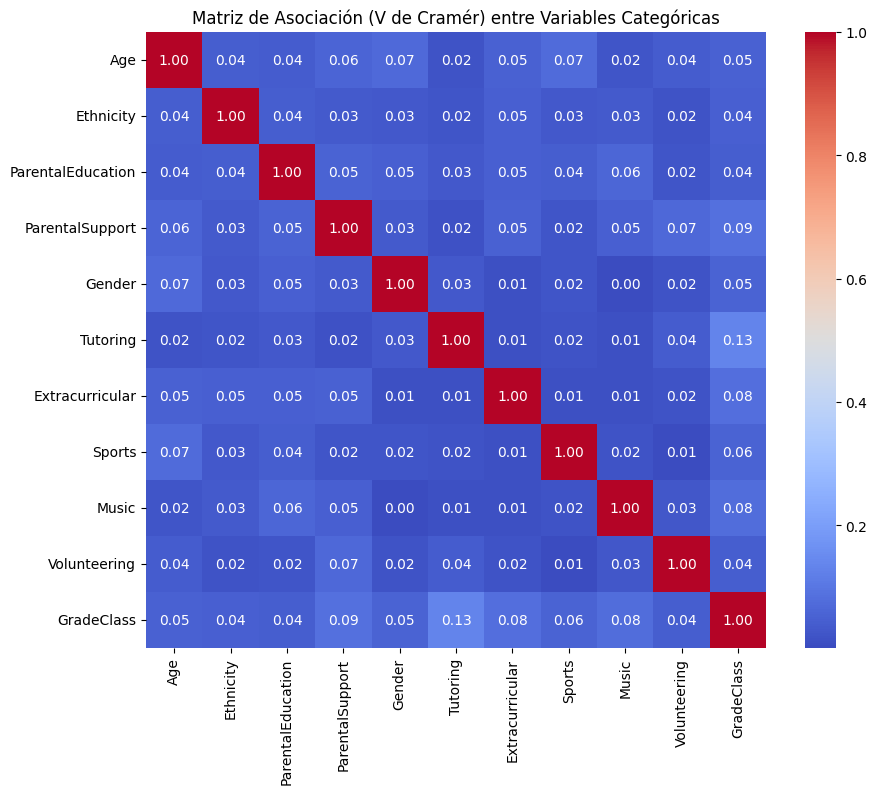

In [109]:
categorical_vars = cat_col + [target] 
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for col1 in categorical_vars:
    for col2 in categorical_vars:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            contingency_table = pd.crosstab(train_set[col1], train_set[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Asociación (V de Cramér) entre Variables Categóricas')
plt.show()

Apenas existe correlación entre las variables binarias y categóricas.

### 4. Preprocesado de las variables

Tras el análisis de nuestras características y determinar que vamos a quedarnos con todas para ver como funciona el modelo, procederemos a estandarizar las variables numéricas, y a convertir la columna 'Age' con un one-hot-encoder.

In [112]:
train_set

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
StudentID,,,,,,,,,,,,,
1643,18,1,0,4,18.118879,24,1,0,1,1,0,0,4.0
2753,16,1,3,2,2.469271,19,0,1,0,0,0,1,4.0
2402,17,0,2,3,3.456401,25,0,0,0,0,0,0,4.0
3033,17,1,0,1,15.838131,25,1,2,0,0,0,0,4.0
1991,16,0,0,0,1.045373,19,1,2,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,15,0,1,0,13.092424,13,1,1,0,0,0,0,4.0
2096,16,0,0,2,2.159249,19,0,4,0,1,0,0,4.0
2131,16,1,0,2,3.572578,14,1,2,1,1,0,0,3.0


In [116]:
# Estandarización variables numéricas y conversión de la variable 'Age' con one-hot-encoder
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), ['Age']),  # OneHotEncoder para categóricas con más de 2 clases
    ("scaler", StandardScaler(), numerical_cols)  # Escalado de numéricas
], remainder='passthrough')  # Mantiene columnas que no requieren transformación

# Crear pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Ajustar el pipeline en el dataset de entrenamiento
pipeline.fit(train_set)

# Transformar ambos conjuntos de datos (sin volver a ajustar)
array_train_transformed = pipeline.transform(train_set)
array_test_transformed = pipeline.transform(test_set)

# Obtener nombres de columnas DESPUÉS de entrenar en train
feature_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame con nombres de columnas correctos
train_transformed = pd.DataFrame(array_train_transformed, columns=feature_names)
test_transformed = pd.DataFrame(array_test_transformed, columns=feature_names)

train_transformed.head()

,onehot__Age_15,onehot__Age_16,onehot__Age_17,onehot__Age_18,scaler__StudyTimeWeekly,scaler__Absences,remainder__Gender,remainder__Ethnicity,remainder__ParentalEducation,remainder__Tutoring,remainder__ParentalSupport,remainder__Extracurricular,remainder__Sports,remainder__Music,remainder__Volunteering,remainder__GradeClass
0,0.0,0.0,0.0,1.0,1.468159,1.105915,1.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0
1,0.0,1.0,0.0,0.0,-1.276773,0.516509,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
2,0.0,0.0,1.0,0.0,-1.103632,1.223797,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,1.0,0.0,1.068117,1.223797,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0
4,0.0,1.0,0.0,0.0,-1.526524,0.516509,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0


In [128]:
# Comprobar que las columnas numéricas se hayan estandarizado correctamente
num_cols = ['scaler__StudyTimeWeekly', 'scaler__Absences']
train_transformed[num_cols].describe()

,scaler__StudyTimeWeekly,scaler__Absences
count,1.913000e+03,1.913000e+03
mean,8.821427e-17,-2.228571e-17
std,1.000261e+00,1.000261e+00
min,-1.708474e+00,-1.723237e+00
25%,-8.401381e-01,-8.980672e-01
50%,-4.028255e-02,4.498347e-02
75%,8.171785e-01,8.701528e-01
max,1.792568e+00,1.695322e+00


### 5. Separación en pares X e Y

In [131]:
# Dividir datos en x e y
X_train = train_transformed.drop('remainder__GradeClass', axis=1)
y_train =train_transformed['remainder__GradeClass']
X_test = test_transformed.drop('remainder__GradeClass', axis = 1)
y_test = test_transformed['remainder__GradeClass']

### 6. Modelado

In [138]:
# Definir modelos base sin hiperparámetros ajustados
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "LightGBM": lgb.LGBMClassifier()
}

In [139]:
# Evaluar los modelos base con Balanced Accuracy
scores = {}

for model_name, model in models.items():
    print(f"Entrenando {model_name}...")

    # Crear pipeline para cada modelo sin preprocesamiento, ya que X_train y X_test ya están transformados
    pipeline_model = Pipeline([
        ("model", model)
    ])

    # Entrenar el modelo
    pipeline_model.fit(X_train, y_train)

    # Predecir en test
    y_pred = pipeline_model.predict(X_test)

    # Evaluar usando balanced_accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    scores[model_name] = balanced_acc

    print(f"{model_name} - Balanced Accuracy: {balanced_acc:.4f}")

# Mostrar los resultados finales ordenados
print("\nResultados finales de los modelos:")
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

Entrenando RandomForest...
RandomForest - Balanced Accuracy: 0.4654
Entrenando GradientBoosting...
GradientBoosting - Balanced Accuracy: 0.4985
Entrenando LogisticRegression...
LogisticRegression - Balanced Accuracy: 0.4533
Entrenando LightGBM...


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 15
[LightGBM] [Info] Start training from score -3.113777
[LightGBM] [Info] Start training from score -2.162800
[LightGBM] [Info] Start training from score -1.832843
[LightGBM] [Info] Start training from score -1.763414
[LightGBM] [Info] Start training from score -0.675017
LightGBM - Balanced Accuracy: 0.5191

Resultados finales de los modelos:
LightGBM: 0.5191
GradientBoosting: 0.4985
RandomForest: 0.4654
LogisticRegression: 0.4533


In [155]:
# Seleccionar el mejor modelo basado en balanced_accuracy
best_model_name = max(scores, key=scores.get)  # Modelo con mayor balanced_accuracy
print(f"\n Modelo seleccionado para optimización: {best_model_name}")

param_grid = {
    "RandomForest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]},
    "GradientBoosting": {"model__n_estimators": [50, 100], "model__learning_rate": [0.01, 0.1]},
    "LightGBM": {"model__num_leaves": [31, 50], "model__learning_rate": [0.01, 0.1]}
}

# Optimizar hiperparámetros en el mejor modelo
print(f"\n Buscando mejores hiperparámetros para {best_model_name}...")

pipeline = Pipeline([
    ("model", models[best_model_name])  # Solo el mejor modelo
])

grid_search = GridSearchCV(pipeline, param_grid[best_model_name], cv=5, scoring="balanced_accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


 Modelo seleccionado para optimización: LightGBM

 Buscando mejores hiperparámetros para LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 15
[LightGBM] [Info] Start training from score -3.113777
[LightGBM] [Info] Start training from score -2.162800
[LightGBM] [Info] Start training from score -1.832843
[LightGBM] [Info] Start training from score -1.763414
[LightGBM] [Info] Start training from score -0.675017


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__num_leaves': [31, 50]},
             scoring='balanced_accuracy')

In [156]:
# Evaluar en test
y_pred = grid_search.best_estimator_.predict(X_test)
best_score = balanced_accuracy_score(y_test, y_pred)

print(f"\n {best_model_name} - Mejor Balanced Accuracy después de ajuste: {best_score:.4f}")

# Guardar el mejor modelo
best_model = grid_search.best_estimator_


 LightGBM - Mejor Balanced Accuracy después de ajuste: 0.5191


In [157]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.14      0.23        22
         1.0       0.49      0.57      0.53        49
         2.0       0.51      0.49      0.50        85
         3.0       0.51      0.47      0.49        86
         4.0       0.85      0.93      0.89       237

    accuracy                           0.70       479
   macro avg       0.62      0.52      0.53       479
weighted avg       0.69      0.70      0.68       479



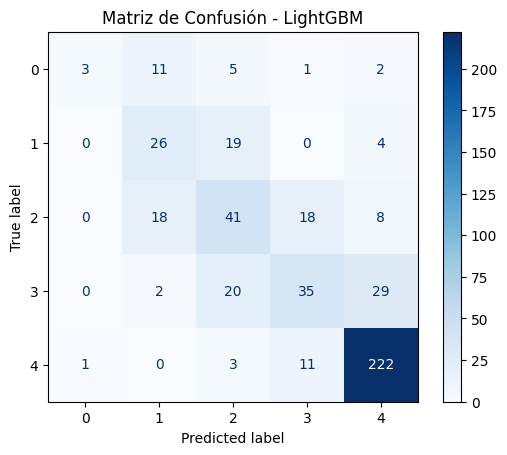

In [154]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()